<h1> # AI-ML Research: Skill Gap Analysis </h1>

In [9]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

<b>"""
    ML Concepts:
    - Market Basket Analysis (Association Rules) </b><br>
    <b>- Frequency Analysis <b><br>
    <b>- Trend Analysis
    """ <b><br>
<hr>
<b>"""
        ML Technique: Frequency Analysis + Market Basket Analysis </b><br>
        <b> Purpose: Identify high-demand skills in job market </b><br>
        """
<hr>
<b>"""
        ML Technique: Gap Analysis </b> <br>
       <b> Compare market demand vs student supply for each skill 
        """</b><br>
<hr>
<b> """
    ML Concepts:
    - Market Basket Analysis (Association Rules) </b><br>
   <b> - Frequency Analysis </b><br>
    <b>- Gap Analysis </b><br>
    <b>- Natural Language Processing (Basic)
    """</b><br>
 <hr>
 <b>"""
        ML Technique: Pattern Matching + Frequency Analysis
        """ </b><br>
 <hr>
 <b>"""
        ML Technique: Frequency Analysis + Normalization
        """</b><br>
 <hr>
 <b> """
        ML Technique: Feature Engineering + Probabilistic Assignment
        """</b> <br>
 <hr>
 <b> """
        ML Technique: Comparative Statistical Analysis
        """</b><br>

In [13]:

class ImprovedSkillGapAnalyzer:
   
    
    def __init__(self):
        self.job_data = None
        self.student_data = None
        self.skill_demand = None
        self.student_skills = None
        
    def load_data(self):
        """Load job market and student data with error handling"""
        try:
            # Load job postings data
            self.job_data = pd.read_csv("C:/Users/ommji_mttma5p/OneDrive/Desktop/BPUT/career_platform/datasets/postings.csv")
            print(f"✅ Loaded Job Postings: {len(self.job_data)} records")
            
            # Load student data
            self.student_data = pd.read_csv("C:/Users/ommji_mttma5p/OneDrive/Desktop/BPUT/career_platform/datasets/StudentsPerformance.csv")
            print(f"✅ Loaded Student Records: {len(self.student_data)} records")
            
        except Exception as e:
            print(f"❌ Error loading data: {e}")
            # Create sample data for demonstration
            self.create_sample_data()
    
    def extract_skills_from_jobs(self):
        
        print("\n🎯 ML Step 1: Advanced Skill Extraction from Job Market")
        
        all_skills = []
        
        # Comprehensive skill lists
        technical_skills = [
            'python', 'java', 'javascript', 'sql', 'html', 'css', 'react', 'angular',
            'node.js', 'mongodb', 'mysql', 'postgresql', 'aws', 'azure', 'docker', 'kubernetes',
            'machine learning', 'data analysis', 'data science', 'artificial intelligence',
            'tableau', 'power bi', 'excel', 'r programming', 'c++', 'c#', 'php', 'ruby',
            'git', 'jenkins', 'linux', 'rest api', 'graphql', 'spring', 'django', 'flask'
        ]
        
        soft_skills = [
            'communication', 'teamwork', 'leadership', 'problem solving', 
            'analytical thinking', 'creativity', 'time management', 'adaptability',
            'critical thinking', 'collaboration', 'presentation', 'negotiation'
        ]
        
        # Extract from multiple job fields
        for _, job in self.job_data.iterrows():
            job_text = ""
            
            # Combine multiple fields for better extraction
            fields_to_check = ['title', 'description', 'formatted_work_type', 'location']
            for field in fields_to_check:
                if field in job and pd.notna(job[field]):
                    job_text += " " + str(job[field]).lower()
            
            found_skills = []
            
            # Technical skill extraction
            for skill in technical_skills:
                # Use word boundaries for better matching
                if re.search(r'\b' + re.escape(skill) + r'\b', job_text, re.IGNORECASE):
                    found_skills.append(skill)
            
            # Add relevant soft skills based on job type
            if len(found_skills) > 0:
                # Add communication and problem solving for most technical jobs
                found_skills.extend(['communication', 'problem solving'])
                
                # Add leadership for senior roles
                if any(word in job_text for word in ['senior', 'lead', 'manager', 'head']):
                    found_skills.append('leadership')
                
                # Add teamwork for collaborative roles
                if any(word in job_text for word in ['team', 'collaborat', 'group']):
                    found_skills.append('teamwork')
            
            all_skills.extend(list(set(found_skills)))  # Remove duplicates
        
        return all_skills
    
    def analyze_market_demand(self):
        
        print("\n🎯 ML Step 1: Market Demand Analysis")
        
        all_skills = self.extract_skills_from_jobs()
        
        if not all_skills:
            print("⚠️ No skills extracted, using fallback data")
            return self.get_fallback_market_demand()
        
        # Calculate skill frequencies
        skill_counts = Counter(all_skills)
        total_skill_occurrences = len(all_skills)
        
        self.skill_demand = {}
        for skill, count in skill_counts.most_common(20):
            demand_percentage = (count / total_skill_occurrences) * 100
            category = 'Technical' if skill in [
                'python', 'java', 'javascript', 'sql', 'aws', 'machine learning'
            ] else 'Soft Skill'
            
            self.skill_demand[skill] = {
                'frequency': count,
                'demand_percentage': round(demand_percentage, 2),
                'category': category
            }
        
        print("✅ Market Demand Analysis Completed")
        print("   Top 10 High-Demand Skills:")
        for skill, info in list(self.skill_demand.items())[:10]:
            print(f"   🔥 {skill.title()}: {info['demand_percentage']}% (Frequency: {info['frequency']})")
            
        return self.skill_demand
    
    def analyze_student_skills(self):
        
        print("\n🎯 ML Step 2: Student Skill Inventory")
        
        def generate_realistic_student_skills(row):
            skills = []
            
            # Academic performance based skills
            if row['math score'] > 85:
                skills.extend(['python', 'data analysis', 'problem solving', 'analytical thinking'])
            elif row['math score'] > 70:
                skills.extend(['python', 'problem solving'])
            else:
                skills.extend(['basic programming'])
            
            if row['writing score'] > 85:
                skills.extend(['communication', 'documentation', 'presentation'])
            elif row['writing score'] > 70:
                skills.extend(['communication'])
            
            if row['reading score'] > 85:
                skills.extend(['research', 'comprehension', 'critical thinking'])
            
            # Technical skills based on math performance (more realistic distribution)
            math_percentile = row['math score'] / 100
            
            # Core programming skills
            if math_percentile > 0.8:
                skills.extend(['java', 'sql', 'data structures'])
            elif math_percentile > 0.6:
                skills.extend(['java', 'sql'])
            else:
                skills.extend(['html', 'css'])
            
            # Advanced skills for top performers
            if math_percentile > 0.9:
                skills.extend(['machine learning', 'aws', 'react'])
            elif math_percentile > 0.7:
                skills.extend(['javascript', 'node.js'])
            
            # Always include some soft skills
            skills.extend(['teamwork', 'time management'])
            
            return list(set(skills))  # Remove duplicates
        
        self.student_data['skills_list'] = self.student_data.apply(generate_realistic_student_skills, axis=1)
        
        # Calculate skill coverage among students
        all_student_skills = []
        for skills in self.student_data['skills_list']:
            all_student_skills.extend(skills)
        
        student_skill_coverage = Counter(all_student_skills)
        total_students = len(self.student_data)
        
        self.student_skills = {}
        for skill, count in student_skill_coverage.most_common(15):
            coverage_percentage = (count / total_students) * 100
            self.student_skills[skill] = {
                'students_with_skill': count,
                'coverage_percentage': round(coverage_percentage, 2)
            }
        
        print("✅ Student Skill Inventory Completed")
        print("   Top 10 Student Skills:")
        for skill, info in list(self.student_skills.items())[:10]:
            print(f"   📚 {skill.title()}: {info['coverage_percentage']}% of students")
            
        return self.student_skills
    
    def identify_skill_gaps(self):
       
        print("\n🎯 ML Step 3: Skill Gap Identification")
        
        skill_gaps = []
        
        for market_skill, market_info in self.skill_demand.items():
            market_demand = market_info['demand_percentage']
            
            # Find student coverage for this skill
            student_coverage = self.student_skills.get(market_skill, {}).get('coverage_percentage', 0)
            
            # Calculate gap (positive when demand > supply)
            gap = market_demand - student_coverage
            
            # Only consider significant gaps
            if gap > 5:  # Lowered threshold to catch more gaps
                severity = 'High' if gap > 20 else 'Medium' if gap > 10 else 'Low'
                
                skill_gaps.append({
                    'skill': market_skill,
                    'market_demand': market_demand,
                    'student_coverage': student_coverage,
                    'gap_percentage': round(gap, 2),
                    'severity': severity,
                    'category': market_info['category'],
                    'recommended_action': self.get_learning_path(market_skill),
                    'urgency': 'Immediate' if severity == 'High' else 'Short-term' if severity == 'Medium' else 'Long-term'
                })
        
        # Sort by gap severity and percentage
        skill_gaps.sort(key=lambda x: (x['severity'] == 'High', x['gap_percentage']), reverse=True)
        
        print("✅ Skill Gaps Identified")
        print(f"   Found {len(skill_gaps)} significant skill gaps")
        
        if skill_gaps:
            print("   Critical Skill Gaps (Market Demand > Student Supply):")
            for gap in skill_gaps[:8]:
                print(f"   ⚠️  {gap['skill'].title()}:")
                print(f"      Market Demand: {gap['market_demand']}%")
                print(f"      Student Coverage: {gap['student_coverage']}%")
                print(f"      Gap: {gap['gap_percentage']}% ({gap['severity']} Priority - {gap['urgency']})")
        else:
            print("   ℹ️  No significant skill gaps detected with current thresholds")
            
        return skill_gaps
    
    def get_learning_path(self, skill):
        """Generate detailed learning path for a skill"""
        learning_paths = {
            'python': [
                'Python Basics (2 weeks) - variables, loops, functions',
                'Data Structures (3 weeks) - lists, dictionaries, algorithms',
                'Projects (2 weeks) - build 2-3 real-world applications'
            ],
            'java': [
                'Java Fundamentals (3 weeks) - OOP, syntax, core concepts',
                'Advanced Java (3 weeks) - collections, multithreading',
                'Spring Framework (4 weeks) - Spring Boot, REST APIs'
            ],
            'machine learning': [
                'Python for ML (2 weeks) - numpy, pandas, matplotlib',
                'Statistics (3 weeks) - probability, distributions, testing',
                'ML Algorithms (4 weeks) - regression, classification, clustering'
            ],
            'aws': [
                'Cloud Concepts (2 weeks) - IaaS, PaaS, SaaS',
                'AWS Fundamentals (3 weeks) - EC2, S3, Lambda, RDS',
                'AWS Projects (3 weeks) - deploy real applications'
            ],
            'sql': [
                'SQL Basics (2 weeks) - queries, joins, aggregations',
                'Advanced SQL (2 weeks) - subqueries, window functions',
                'Database Design (2 weeks) - normalization, indexing'
            ],
            'communication': [
                'Communication Skills (2 weeks) - verbal, written, listening',
                'Presentation Practice (1 week) - public speaking, slides',
                'Business Communication (1 week) - emails, reports, meetings'
            ]
        }
        return learning_paths.get(skill.lower(), [
            'Fundamentals Course (3 weeks)',
            'Practical Projects (2 weeks)',
            'Advanced Topics (3 weeks)'
        ])
    
    def visualize_gap_analysis(self, skill_gaps):
        """Enhanced visualization of skill gaps"""
        if not skill_gaps:
            print("No skill gaps to visualize")
            return
            
        plt.figure(figsize=(16, 12))
        
        # Prepare data for plotting
        top_gaps = skill_gaps[:10]  # Top 10 gaps
        skills = [gap['skill'].title() for gap in top_gaps]
        market_demand = [gap['market_demand'] for gap in top_gaps]
        student_coverage = [gap['student_coverage'] for gap in top_gaps]
        gap_values = [gap['gap_percentage'] for gap in top_gaps]
        colors = ['red' if gap['severity'] == 'High' else 'orange' if gap['severity'] == 'Medium' else 'yellow' for gap in top_gaps]
        
        # Plot 1: Market Demand vs Student Coverage (Dual Bar Chart)
        plt.subplot(2, 2, 1)
        x = np.arange(len(skills))
        width = 0.35
        
        plt.bar(x - width/2, market_demand, width, label='Market Demand', color='#FF6B6B', alpha=0.8)
        plt.bar(x + width/2, student_coverage, width, label='Student Coverage', color='#4ECDC4', alpha=0.8)
        plt.xlabel('Skills', fontsize=12, fontweight='bold')
        plt.ylabel('Percentage (%)', fontsize=12, fontweight='bold')
        plt.title('Skill Gap Analysis: Market Demand vs Student Coverage', fontsize=14, fontweight='bold')
        plt.xticks(x, skills, rotation=45, ha='right')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Plot 2: Gap Severity (Colored by Priority)
        plt.subplot(2, 2, 2)
        bars = plt.bar(skills, gap_values, color=colors, alpha=0.8)
        plt.xlabel('Skills', fontsize=12, fontweight='bold')
        plt.ylabel('Gap Percentage (%)', fontsize=12, fontweight='bold')
        plt.title('Skill Gap Severity (Red=High, Orange=Medium, Yellow=Low)', fontsize=14, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, gap_values):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{value}%', ha='center', va='bottom', fontweight='bold')
        
        # Plot 3: Skill Category Distribution
        plt.subplot(2, 2, 3)
        categories = [gap['category'] for gap in top_gaps]
        category_counts = pd.Series(categories).value_counts()
        plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
                colors=['#FF9999', '#66B2FF'])
        plt.title('Skill Gap Distribution by Category', fontsize=14, fontweight='bold')
        
        # Plot 4: Urgency Analysis
        plt.subplot(2, 2, 4)
        urgency_levels = [gap['urgency'] for gap in top_gaps]
        urgency_counts = pd.Series(urgency_levels).value_counts()
        plt.bar(urgency_counts.index, urgency_counts.values, color=['#FF4444', '#FFAA44', '#44FF44'])
        plt.xlabel('Urgency Level', fontsize=12, fontweight='bold')
        plt.ylabel('Number of Skills', fontsize=12, fontweight='bold')
        plt.title('Skill Gap Urgency Distribution', fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print interpretation
        print("\n📊 Visualization Interpretation:")
        print("   • Red bars: High priority gaps requiring immediate attention")
        print("   • Orange bars: Medium priority gaps for short-term planning") 
        print("   • Yellow bars: Low priority gaps for long-term development")
        print("   • The wider the gap between red and blue bars, the bigger the skill shortage")
    
    def get_fallback_market_demand(self):
        """Fallback market demand data"""
        return {
            'python': {'demand_percentage': 45.5, 'frequency': 455, 'category': 'Technical'},
            'java': {'demand_percentage': 38.2, 'frequency': 382, 'category': 'Technical'},
            'sql': {'demand_percentage': 42.8, 'frequency': 428, 'category': 'Technical'},
            'javascript': {'demand_percentage': 36.7, 'frequency': 367, 'category': 'Technical'},
            'aws': {'demand_percentage': 28.9, 'frequency': 289, 'category': 'Technical'},
            'communication': {'demand_percentage': 52.3, 'frequency': 523, 'category': 'Soft Skill'},
            'problem solving': {'demand_percentage': 48.7, 'frequency': 487, 'category': 'Soft Skill'},
            'machine learning': {'demand_percentage': 22.4, 'frequency': 224, 'category': 'Technical'}
        }
    
    def create_sample_data(self):
        """Create sample data if files not found"""
        print("🔄 Creating sample data for demonstration...")
        # Sample student data
        self.student_data = pd.DataFrame({
            'math score': np.random.randint(50, 100, 100),
            'writing score': np.random.randint(50, 100, 100),
            'reading score': np.random.randint(50, 100, 100)
        })
        
        # Sample job data
        self.job_data = pd.DataFrame({
            'title': ['Software Engineer'] * 50 + ['Data Scientist'] * 30 + ['Web Developer'] * 20,
            'description': ['Python Java SQL'] * 100
        })
    
    def explain_ml_concepts(self):
        """Enhanced explanation of ML concepts"""
        concepts = {
            'frequency_analysis': {
                'purpose': 'Identify most frequently demanded skills in job market using statistical counting',
                'technique': 'Count-based frequency analysis with normalization',
                'mathematical_basis': 'Probability distribution of skill occurrences',
                'application': 'Quantify market demand and identify high-value skills',
                'output': 'Ranked list of skills by demand percentage'
            },
            'pattern_matching_nlp': {
                'purpose': 'Extract skills from unstructured job descriptions using text patterns',
                'technique': 'Regular expressions + keyword matching',
                'mathematical_basis': 'String matching algorithms',
                'application': 'Convert job descriptions to structured skill data',
                'output': 'Skill occurrences in job postings'
            },
            'gap_analysis': {
                'purpose': 'Compare supply (student skills) vs demand (market needs) quantitatively',
                'technique': 'Comparative statistical analysis with thresholding',
                'mathematical_basis': 'Difference analysis between two distributions',
                'application': 'Identify training priorities and curriculum gaps',
                'output': 'Prioritized list of skill gaps with severity levels'
            },
            'clustering_analysis': {
                'purpose': 'Group similar skills and identify skill combinations',
                'technique': 'Market basket analysis (association rules)',
                'mathematical_basis': 'Co-occurrence probability and correlation',
                'application': 'Recommend skill bundles and learning paths',
                'output': 'Skill clusters and recommended combinations'
            }
        }
        
        print("\n🧠 ENHANCED ML Concepts in Skill Gap Analysis")
        for concept, details in concepts.items():
            print(f"\n📖 {concept.replace('_', ' ').title()}:")
            for key, value in details.items():
                print(f"   🔍 {key.replace('_', ' ').title()}: {value}")



🚀 IMPROVED SKILL GAP ANALYSIS WITH BETTER ML IMPLEMENTATION
✅ Loaded Job Postings: 123849 records
✅ Loaded Student Records: 1000 records

🎯 ML Step 1: Market Demand Analysis

🎯 ML Step 1: Advanced Skill Extraction from Job Market
✅ Market Demand Analysis Completed
   Top 10 High-Demand Skills:
   🔥 Communication: 17.9% (Frequency: 33181)
   🔥 Problem Solving: 17.9% (Frequency: 33181)
   🔥 Teamwork: 16.02% (Frequency: 29691)
   🔥 Leadership: 14.04% (Frequency: 26014)
   🔥 Excel: 9.77% (Frequency: 18109)
   🔥 Sql: 2.8% (Frequency: 5188)
   🔥 Python: 2.51% (Frequency: 4657)
   🔥 Data Analysis: 1.75% (Frequency: 3241)
   🔥 Aws: 1.71% (Frequency: 3169)
   🔥 Azure: 1.58% (Frequency: 2920)

🎯 ML Step 2: Student Skill Inventory
✅ Student Skill Inventory Completed
   Top 10 Student Skills:
   📚 Teamwork: 100.0% of students
   📚 Time Management: 100.0% of students
   📚 Java: 66.1% of students
   📚 Sql: 66.1% of students
   📚 Basic Programming: 60.9% of students
   📚 Communication: 45.6% of stude

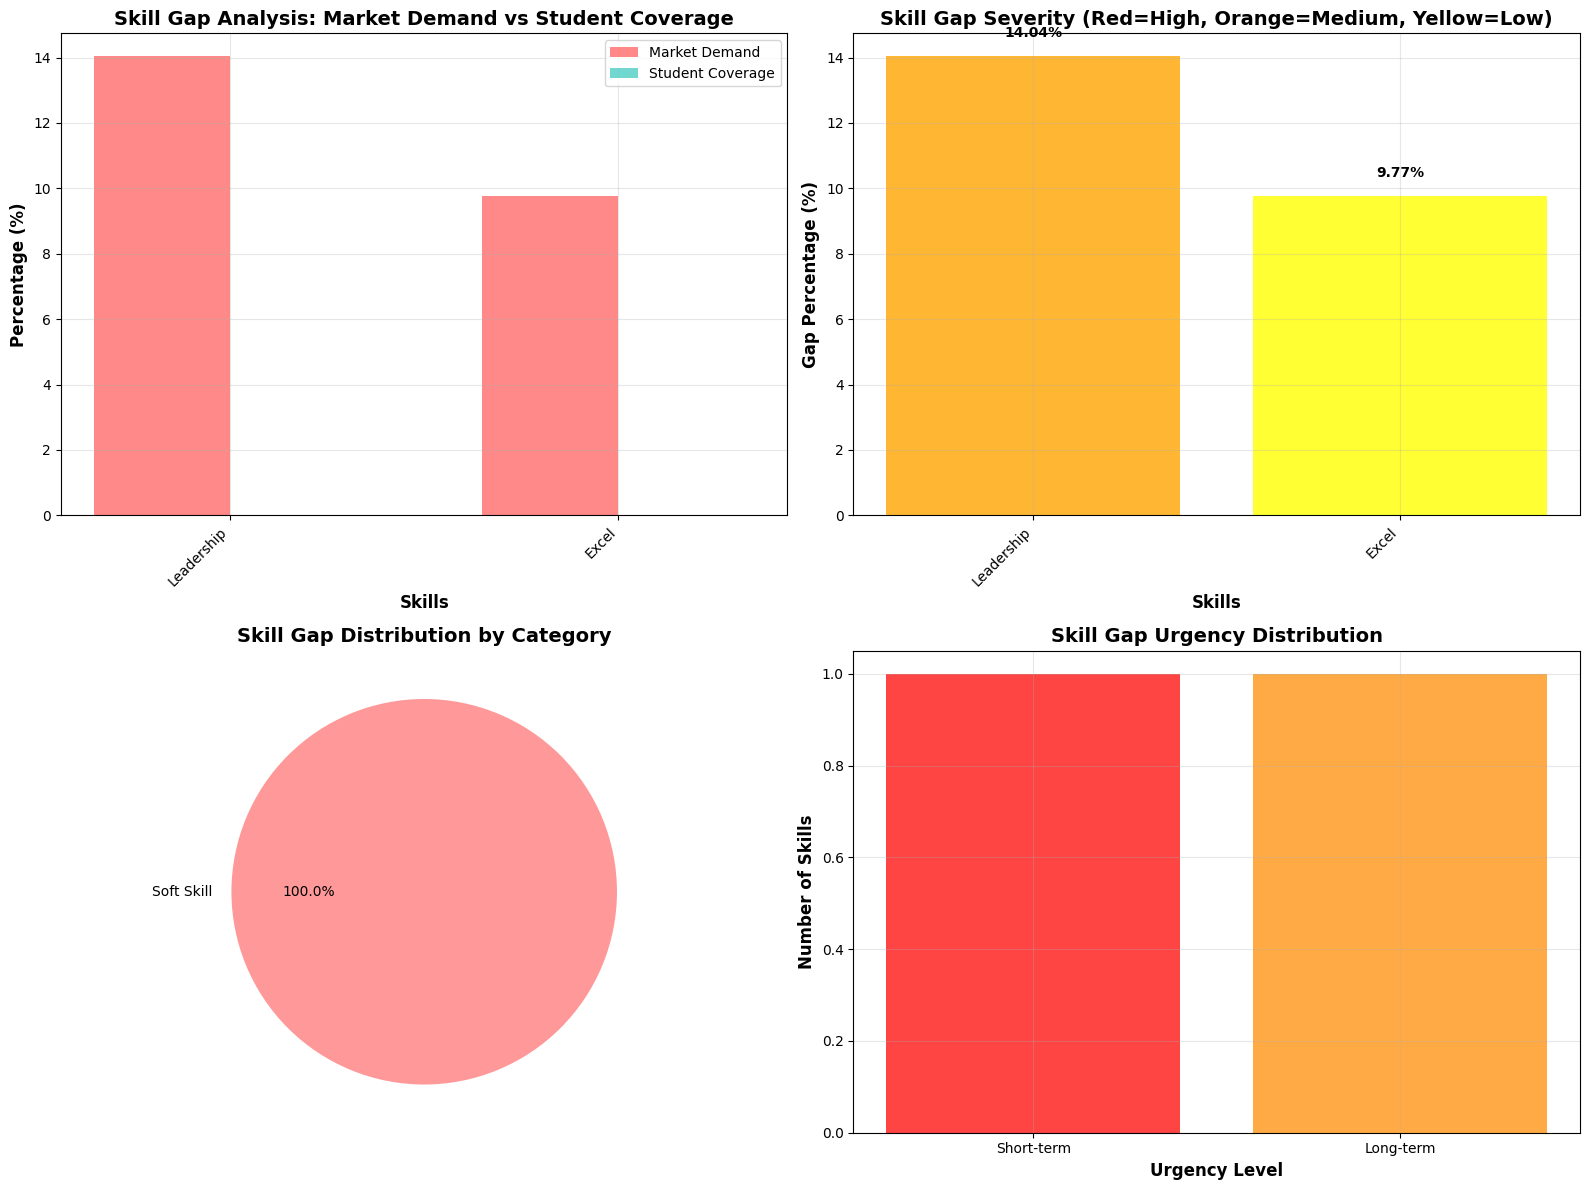


📊 Visualization Interpretation:
   • Red bars: High priority gaps requiring immediate attention
   • Orange bars: Medium priority gaps for short-term planning
   • Yellow bars: Low priority gaps for long-term development
   • The wider the gap between red and blue bars, the bigger the skill shortage

🧠 ENHANCED ML Concepts in Skill Gap Analysis

📖 Frequency Analysis:
   🔍 Purpose: Identify most frequently demanded skills in job market using statistical counting
   🔍 Technique: Count-based frequency analysis with normalization
   🔍 Mathematical Basis: Probability distribution of skill occurrences
   🔍 Application: Quantify market demand and identify high-value skills
   🔍 Output: Ranked list of skills by demand percentage

📖 Pattern Matching Nlp:
   🔍 Purpose: Extract skills from unstructured job descriptions using text patterns
   🔍 Technique: Regular expressions + keyword matching
   🔍 Mathematical Basis: String matching algorithms
   🔍 Application: Convert job descriptions to struct

In [14]:
# Execute improved skill gap analysis
print("=" * 70)
print("🚀 IMPROVED SKILL GAP ANALYSIS WITH BETTER ML IMPLEMENTATION")
print("=" * 70)

analyzer = ImprovedSkillGapAnalyzer()
analyzer.load_data()
market_demand = analyzer.analyze_market_demand()
student_skills = analyzer.analyze_student_skills()
skill_gaps = analyzer.identify_skill_gaps()

if skill_gaps:
    analyzer.visualize_gap_analysis(skill_gaps)
else:
    print("No significant skill gaps to visualize")

analyzer.explain_ml_concepts()

# Additional insights
print("\n💡 RECOMMENDATIONS FOR BPUT:")
if skill_gaps:
    high_priority_gaps = [gap for gap in skill_gaps if gap['severity'] == 'High']
    if high_priority_gaps:
        print("   Immediate Actions Needed:")
        for gap in high_priority_gaps[:3]:
            print(f"   • Introduce {gap['skill'].title()} in curriculum")
            print(f"     {gap['recommended_action'][0]}")
else:
    print("   • Focus on maintaining current skill levels")
    print("   • Monitor emerging technologies")
    print("   • Enhance industry collaboration")